Cargo librerias

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

Creo los dataframe a apertir de archivos de excel

In [2]:
df_train = pd.read_excel('./bike_train.xlsx')
df_train.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [3]:
df_test = pd.read_excel('./bike_test.xlsx')
df_test.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0    12000 2012-05-20       2   1     5   4        0        0           0   
1    12001 2012-05-20       2   1     5   5        0        0           0   
2    12002 2012-05-20       2   1     5   6        0        0           0   
3    12003 2012-05-20       2   1     5   7        0        0           0   
4    12004 2012-05-20       2   1     5   8        0        0           0   

   weathersit  temp   atemp   hum  windspeed  
0           1  0.52  0.5000  0.68     0.0896  
1           1  0.50  0.4848  0.72     0.1045  
2           1  0.50  0.4848  0.63     0.1343  
3           1  0.52  0.5000  0.68     0.1940  
4           1  0.56  0.5303  0.56     0.1642

# EDA

Tabajaremos con series de tiempo, por lo cual todo el analisis va a realizar en este enfoque.

Exploracion de  los Dataframe

Dataframe Train

In [4]:
df_train.shape

(11999, 17)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

In [6]:
print('fecha_inicio', df_train.dteday.min())
print('fecha_fin', df_train.dteday.max())
print(df_train.dteday.max() - df_train.dteday.min())

fecha_inicio 2011-01-01 00:00:00
fecha_fin 2012-05-20 00:00:00
505 days 00:00:00


- Tenemos una `frecuencia de muestreo horaria` y una `ventana temporal` de 505 días. Lo más probable es que sea necesario resamplear la muestra. 

In [7]:
df_train.describe()

instant        season            yr          mnth            hr  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean    6000.000000      2.210684      0.279523      5.530294     11.556630   
std     3463.957275      1.088798      0.448784      3.433005      6.911891   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     3000.500000      1.000000      0.000000      3.000000      6.000000   
50%     6000.000000      2.000000      0.000000      5.000000     12.000000   
75%     8999.500000      3.000000      1.000000      8.000000     18.000000   
max    11999.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       0.027752      3.009334      0.684057      1.435036      0.465704   
std        0.164269      2.005264      0.464910      0.650894      0.188576   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.320000   
50%        0.000000      3.000000      1.000000      1.000000      0.460000   
75%        0.000000      5.000000      1.000000      2.000000      0.620000   
max        1.000000      6.000000      1.000000      4.000000      0.960000   

              atemp           hum     windspeed        casual    registered  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       0.448888      0.625770      0.196433     30.049837    128.545129   
std        0.169633      0.200637      0.125394     43.596915    124.692750   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.303000      0.470000      0.104500      3.000000     29.000000   
50%        0.454500      0.620000      0.194000     13.000000     98.000000   
75%        0.590900      0.790000      0.283600     39.000000    185.000000   
max        1.000000      1.000000      0.850700    367.000000    770.000000   

                cnt  
count  11999.000000  
mean     158.594966  
std      151.392952  
min        1.000000  
25%       34.000000  
50%      118.000000  
75%      232.000000  
max      957.000000

Dataframe TEST

In [8]:
df_test.shape

(5380, 14)

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     5380 non-null   int64         
 1   dteday      5380 non-null   datetime64[ns]
 2   season      5380 non-null   int64         
 3   yr          5380 non-null   int64         
 4   mnth        5380 non-null   int64         
 5   hr          5380 non-null   int64         
 6   holiday     5380 non-null   int64         
 7   weekday     5380 non-null   int64         
 8   workingday  5380 non-null   int64         
 9   weathersit  5380 non-null   int64         
 10  temp        5380 non-null   float64       
 11  atemp       5380 non-null   float64       
 12  hum         5380 non-null   float64       
 13  windspeed   5380 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 588.6 KB


In [10]:
df_test.describe()

instant       season      yr         mnth           hr  \
count   5380.000000  5380.000000  5380.0  5380.000000  5380.000000   
mean   14689.500000     3.150558     1.0     8.784758    11.524721   
std     1553.216555     0.839184     0.0     2.145166     6.920601   
min    12000.000000     1.000000     1.0     5.000000     0.000000   
25%    13344.750000     3.000000     1.0     7.000000     6.000000   
50%    14689.500000     3.000000     1.0     9.000000    12.000000   
75%    16034.250000     4.000000     1.0    11.000000    18.000000   
max    17379.000000     4.000000     1.0    12.000000    23.000000   

           holiday      weekday  workingday   weathersit         temp  \
count  5380.000000  5380.000000  5380.00000  5380.000000  5380.000000   
mean      0.031041     2.991078     0.67974     1.403532     0.566758   
std       0.173444     2.007032     0.46662     0.612343     0.182800   
min       0.000000     0.000000     0.00000     1.000000     0.140000   
25%       0.000000     1.000000     0.00000     1.000000     0.400000   
50%       0.000000     3.000000     1.00000     1.000000     0.600000   
75%       0.000000     5.000000     1.00000     2.000000     0.700000   
max       1.000000     6.000000     1.00000     3.000000     1.000000   

             atemp          hum    windspeed  
count  5380.000000  5380.000000  5380.000000  
mean      0.535741     0.630483     0.175968  
std       0.161300     0.174493     0.113988  
min       0.151500     0.160000     0.000000  
25%       0.409100     0.490000     0.104500  
50%       0.575800     0.640000     0.164200  
75%       0.666700     0.780000     0.253700  
max       0.924200     1.000000     0.656700

Cambio tipos de datos

Graficamos y Analizamos datos:

Temas a analizar:
  Correlacion de rentadas con:
                                - cada variable
                                - grupo de variables
                                - día de la semana
                                - clima
                                - Epoca del año
                                - Usuarios Casuales


<AxesSubplot:xlabel='dteday', ylabel='cnt'>

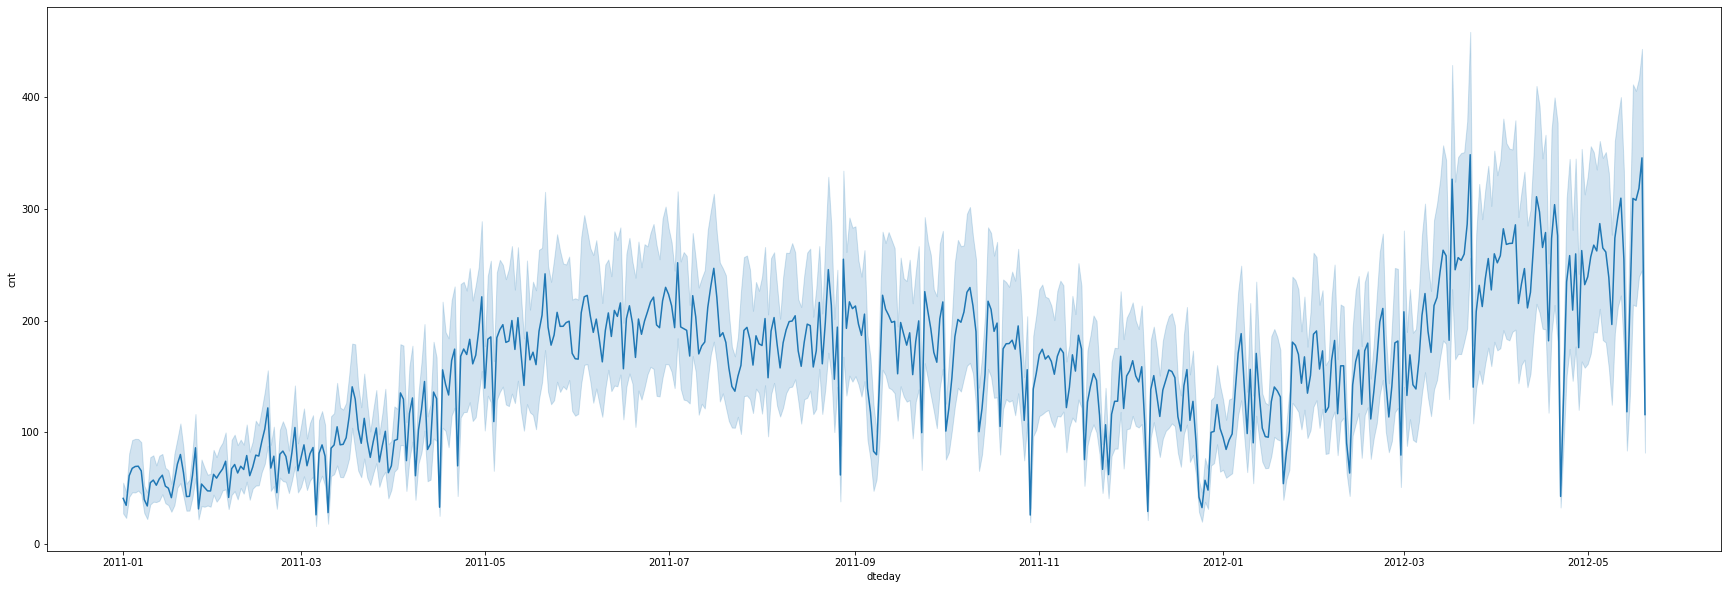

In [11]:
fig, ax = plt.subplots(figsize = (30, 10))
sns.lineplot(x= df_train['dteday'], y= df_train['cnt'])

Realizamos resample para visualizar mejor y reducir ruidos

In [12]:
df_train_resample_D = df_train.resample('D', on = 'dteday').mean()

In [13]:
df_train_resample_D.head()

instant  season   yr  mnth         hr  holiday  weekday  \
dteday                                                                
2011-01-01     12.5     1.0  0.0   1.0  11.500000      0.0      6.0   
2011-01-02     36.0     1.0  0.0   1.0  11.782609      0.0      0.0   
2011-01-03     58.5     1.0  0.0   1.0  12.318182      0.0      1.0   
2011-01-04     81.0     1.0  0.0   1.0  11.869565      0.0      2.0   
2011-01-05    104.0     1.0  0.0   1.0  11.869565      0.0      3.0   

            workingday  weathersit      temp     atemp       hum  windspeed  \
dteday                                                                        
2011-01-01         0.0    1.583333  0.344167  0.363625  0.805833   0.160446   
2011-01-02         0.0    1.956522  0.363478  0.353739  0.696087   0.248539   
2011-01-03         1.0    1.000000  0.196364  0.189405  0.437273   0.248309   
2011-01-04         1.0    1.043478  0.200000  0.212122  0.590435   0.160296   
2011-01-05         1.0    1.000000  0.226957  0.229270  0.436957   0.186900   

               casual  registered        cnt  
dteday                                        
2011-01-01  13.791667   27.250000  41.041667  
2011-01-02   5.695652   29.130435  34.826087  
2011-01-03   5.454545   55.863636  61.318182  
2011-01-04   4.695652   63.217391  67.913043  
2011-01-05   3.565217   66.000000  69.565217

<AxesSubplot:xlabel='dteday', ylabel='cnt'>

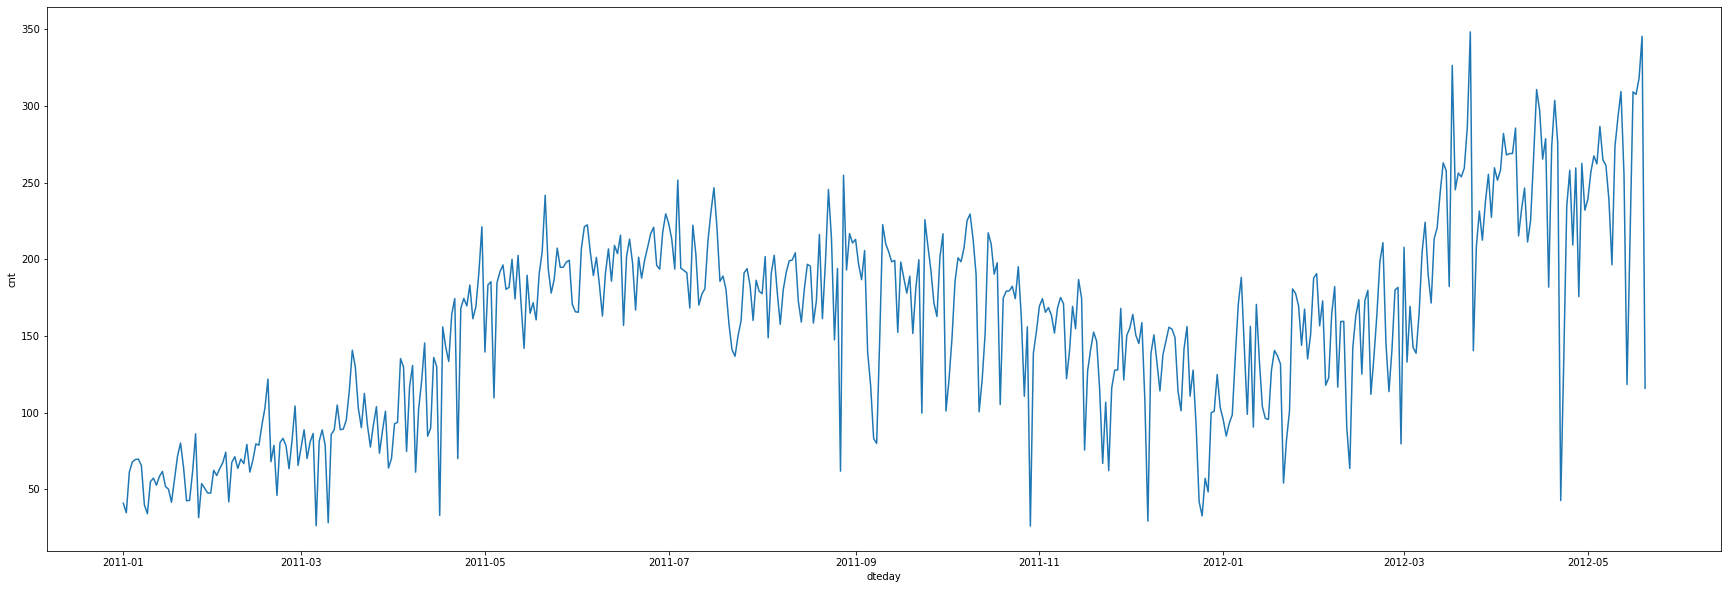

In [14]:
fig, ax = plt.subplots(figsize = (30, 10))
sns.lineplot(x= df_train_resample_D.index, y= df_train_resample_D['cnt'])

Resample semanal

In [15]:
df_train_resample_W = df_train.resample('W', on = 'dteday').mean()

In [16]:
df_train_resample_W.head()

instant  season   yr  mnth         hr   holiday   weekday  \
dteday                                                                  
2011-01-02     24.0     1.0  0.0   1.0  11.638298  0.000000  3.063830   
2011-01-09    128.5     1.0  0.0   1.0  11.820988  0.000000  3.012346   
2011-01-16    291.0     1.0  0.0   1.0  11.742331  0.000000  3.000000   
2011-01-23    449.0     1.0  0.0   1.0  12.117647  0.156863  3.078431   
2011-01-30    595.0     1.0  0.0   1.0  11.956835  0.000000  2.892086   

            workingday  weathersit      temp     atemp       hum  windspeed  \
dteday                                                                        
2011-01-02    0.000000    1.765957  0.353617  0.358787  0.752128   0.203555   
2011-01-09    0.703704    1.259259  0.189136  0.192397  0.493333   0.212834   
2011-01-16    0.705521    1.349693  0.183804  0.189537  0.534479   0.203652   
2011-01-23    0.542484    1.555556  0.180784  0.182322  0.545294   0.222324   
2011-01-30    0.669065    1.625899  0.191367  0.207873  0.680863   0.144749   

              casual  registered        cnt  
dteday                                       
2011-01-02  9.829787   28.170213  38.000000  
2011-01-09  4.123457   53.950617  58.074074  
2011-01-16  4.134969   51.233129  55.368098  
2011-01-23  3.954248   53.366013  57.320261  
2011-01-30  4.474820   50.913669  55.388489

<AxesSubplot:xlabel='dteday', ylabel='cnt'>

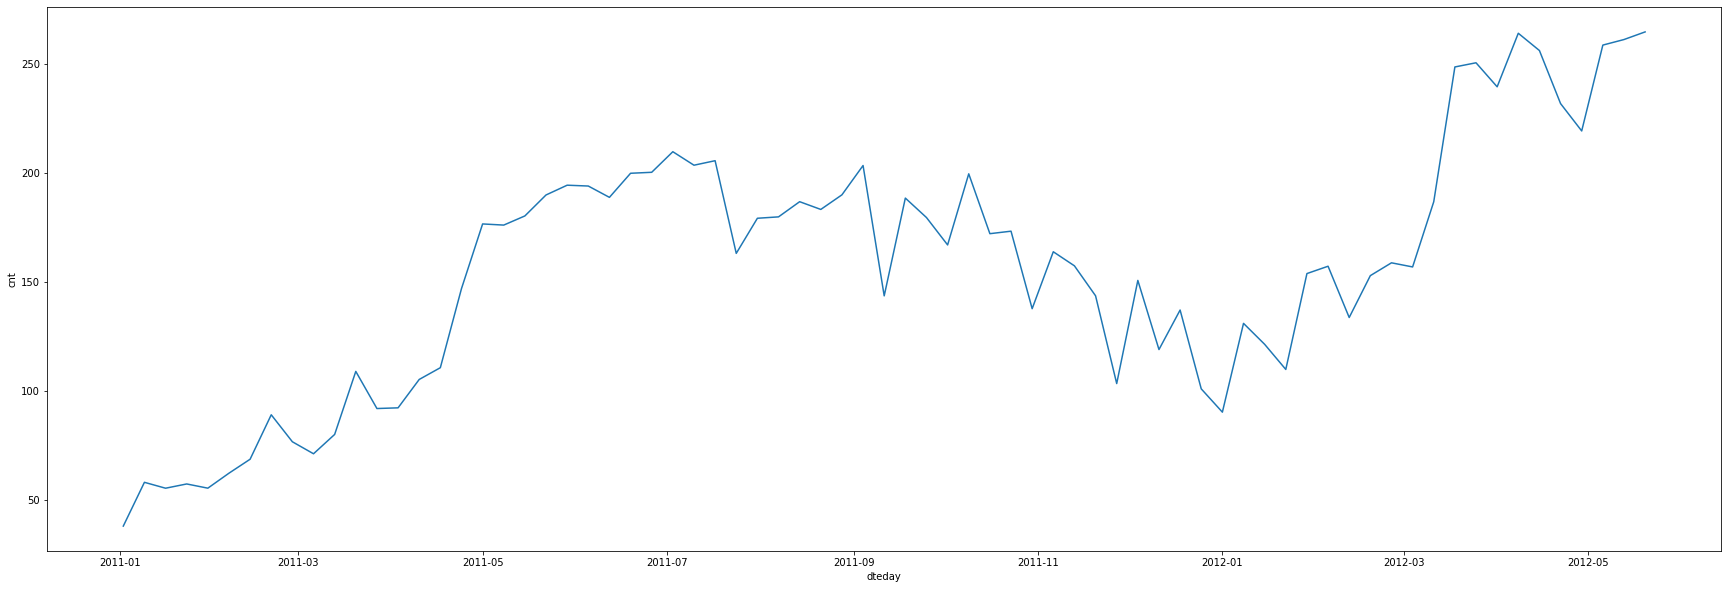

In [17]:
fig, ax = plt.subplots(figsize = (30, 10))
sns.lineplot(x= df_train_resample_W.index, y= df_train_resample_W['cnt'])

Se observa una alta mejora en la reducción de ruido. Deberemos ver cuanto afecta a la precisión de la predicción

#### Componentes de la serie de tiempo

- Media Móvil

Trabajaremos con todas las muestras

In [18]:
# cantidad de muestras
df_train_copia = df_train.copy()
len(df_train_copia)

11999

In [19]:
ventana_media_movil = (660)

In [20]:
semanal_promedio_tendencia = df_train_copia.cnt.rolling(window=ventana_media_movil, center = True).mean()
semanal_promedio_tendencia

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
11994   NaN
11995   NaN
11996   NaN
11997   NaN
11998   NaN
Name: cnt, Length: 11999, dtype: float64

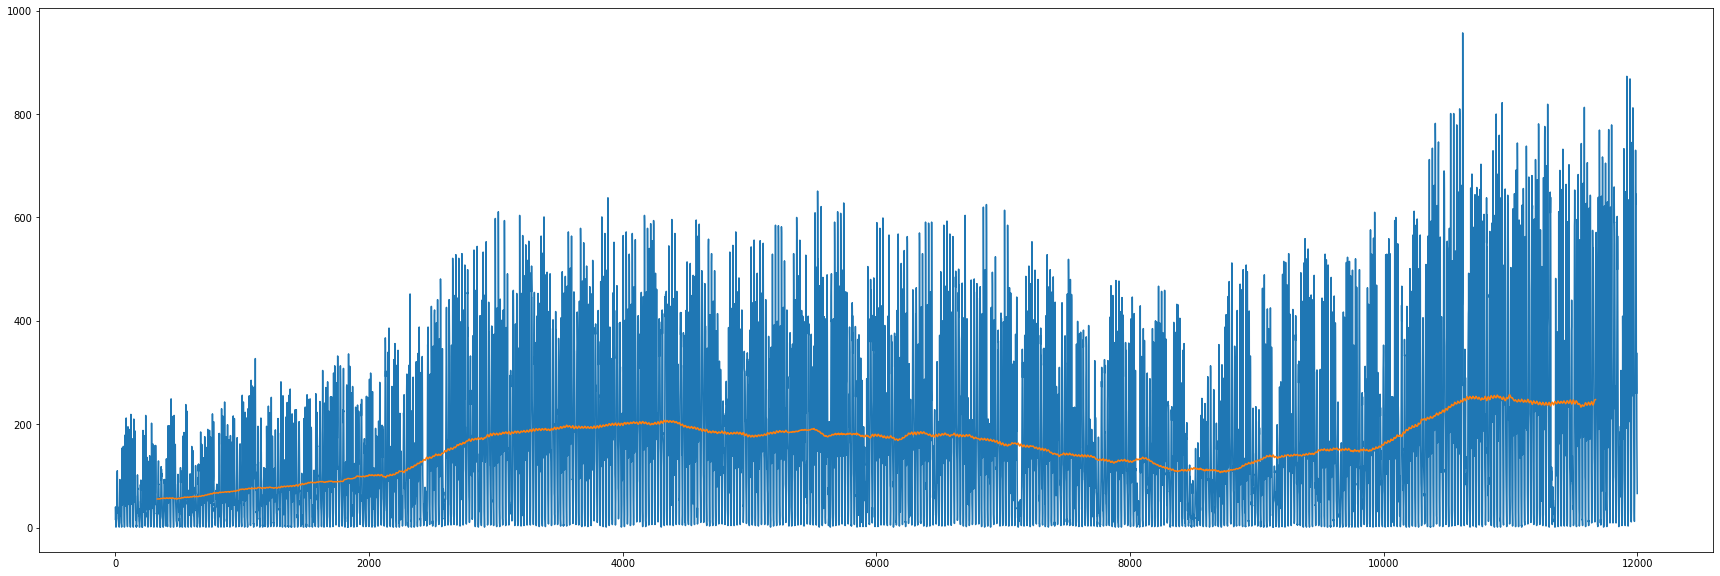

In [21]:
fig, ax = plt.subplots(figsize = (30, 10))
plt.plot(df_train_copia.index, df_train_copia.cnt)
plt.plot(semanal_promedio_tendencia)

- Estacionalidad

In [22]:
df_train_index = df_train_copia.set_index('dteday')

Text(0, 0.5, 'Rentas')

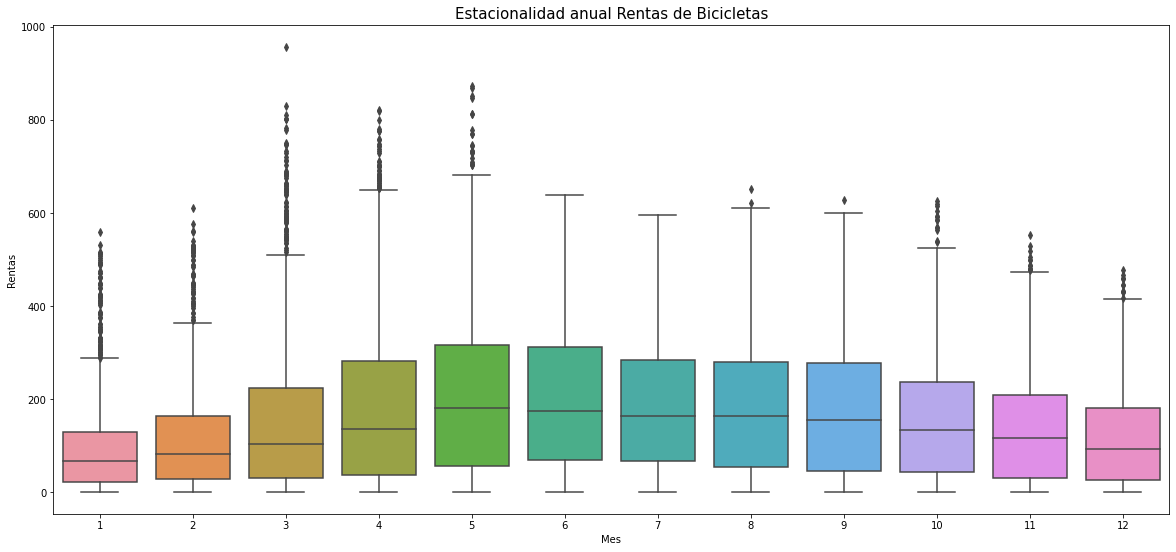

In [23]:
plt.figure(figsize = (20,9))
sns.boxplot(data=df_train_index,x=df_train_index.index.month,y= df_train_index.cnt)
plt.title('Estacionalidad anual Rentas de Bicicletas', fontsize = 15)
plt.xlabel('Mes')
plt.ylabel('Rentas')

- Otros analisis

In [24]:
# Correlación
# columnas season	yr	mnth	hr	holiday	weekday	workingday	weathersit	temp	atemp	hum	windspeed	casual	registered	cnt
df_corr = df_train_copia[['yr',	'mnth', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',  'cnt']].corr()

In [25]:
df_corr

yr      mnth    season   holiday   weekday  workingday  \
yr          1.000000 -0.488103 -0.446665  0.001039 -0.002714    0.001068   
mnth       -0.488103  1.000000  0.865268  0.009372  0.014500    0.006441   
season     -0.446665  0.865268  1.000000 -0.008928 -0.003688    0.012630   
holiday     0.001039  0.009372 -0.008928  1.000000 -0.102503   -0.248601   
weekday    -0.002714  0.014500 -0.003688 -0.102503  1.000000    0.031057   
workingday  0.001068  0.006441  0.012630 -0.248601  0.031057    1.000000   
weathersit -0.006309 -0.012239 -0.009029 -0.014707  0.017259    0.042202   
temp       -0.198929  0.353330  0.410790 -0.028519 -0.010002    0.062273   
atemp      -0.190360  0.358541  0.413196 -0.038005 -0.009841    0.066305   
hum        -0.141319  0.201669  0.198937 -0.036672 -0.025932    0.022805   
windspeed   0.067356 -0.147042 -0.142924  0.022681  0.008447   -0.002493   
cnt         0.156960  0.073431  0.111369 -0.030304  0.022618    0.025132   

            weathersit      temp     atemp       hum  windspeed       cnt  
yr           -0.006309 -0.198929 -0.190360 -0.141319   0.067356  0.156960  
mnth         -0.012239  0.353330  0.358541  0.201669  -0.147042  0.073431  
season       -0.009029  0.410790  0.413196  0.198937  -0.142924  0.111369  
holiday      -0.014707 -0.028519 -0.038005 -0.036672   0.022681 -0.030304  
weekday       0.017259 -0.010002 -0.009841 -0.025932   0.008447  0.022618  
workingday    0.042202  0.062273  0.066305  0.022805  -0.002493  0.025132  
weathersit    1.000000 -0.080149 -0.081386  0.430378   0.009195 -0.149848  
temp         -0.080149  1.000000  0.991785 -0.019289  -0.013984  0.395743  
atemp        -0.081386  0.991785  1.000000 -0.003669  -0.057619  0.395234  
hum           0.430378 -0.019289 -0.003669  1.000000  -0.295765 -0.303672  
windspeed     0.009195 -0.013984 -0.057619 -0.295765   1.000000  0.094791  
cnt          -0.149848  0.395743  0.395234 -0.303672   0.094791  1.000000

Text(0.5, 1.0, 'Dia Laboral')

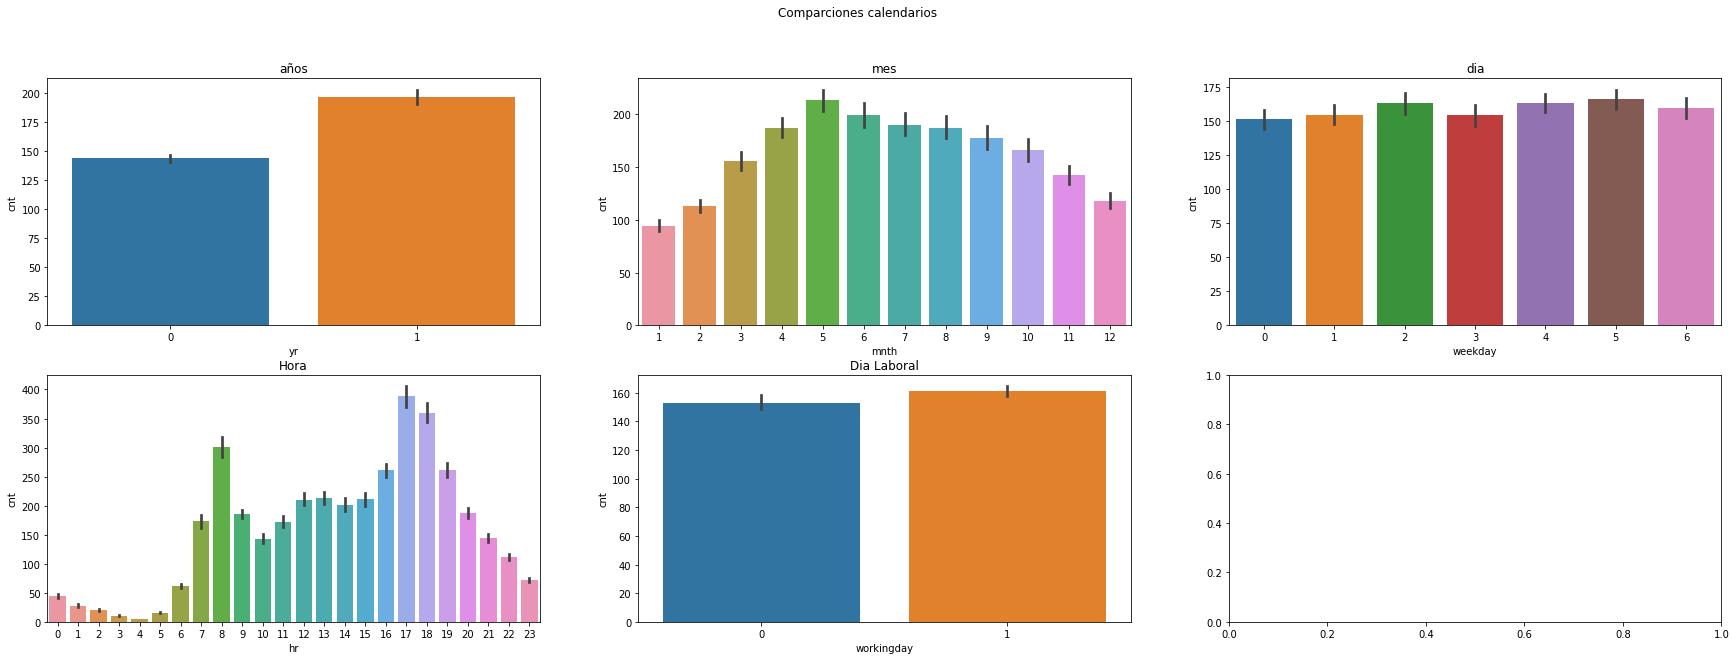

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10), sharey=False)
fig.suptitle('Comparciones calendarios')

# Año
sns.barplot(ax=axes[0,0], x=df_train_copia['yr'], y=df_train_copia['cnt'])
axes[0,0].set_title('años')

# Mes
sns.barplot(ax=axes[0,1], x=df_train_copia['mnth'], y=df_train_copia['cnt'])
axes[0,1].set_title('mes')

# Dia
sns.barplot(ax=axes[0,2], x=df_train_copia['weekday'], y=df_train_copia['cnt'])
axes[0,2].set_title('dia')

# Hora 
sns.barplot(ax=axes[1,0], x=df_train_copia['hr'], y=df_train_copia['cnt'])
axes[1,0].set_title('Hora')

# Hora 
sns.barplot(ax=axes[1,1], x=df_train_copia['workingday'], y=df_train_copia['cnt'])
axes[1,1].set_title('Dia Laboral')


Text(0.5, 1.0, 'Velocidad viento')

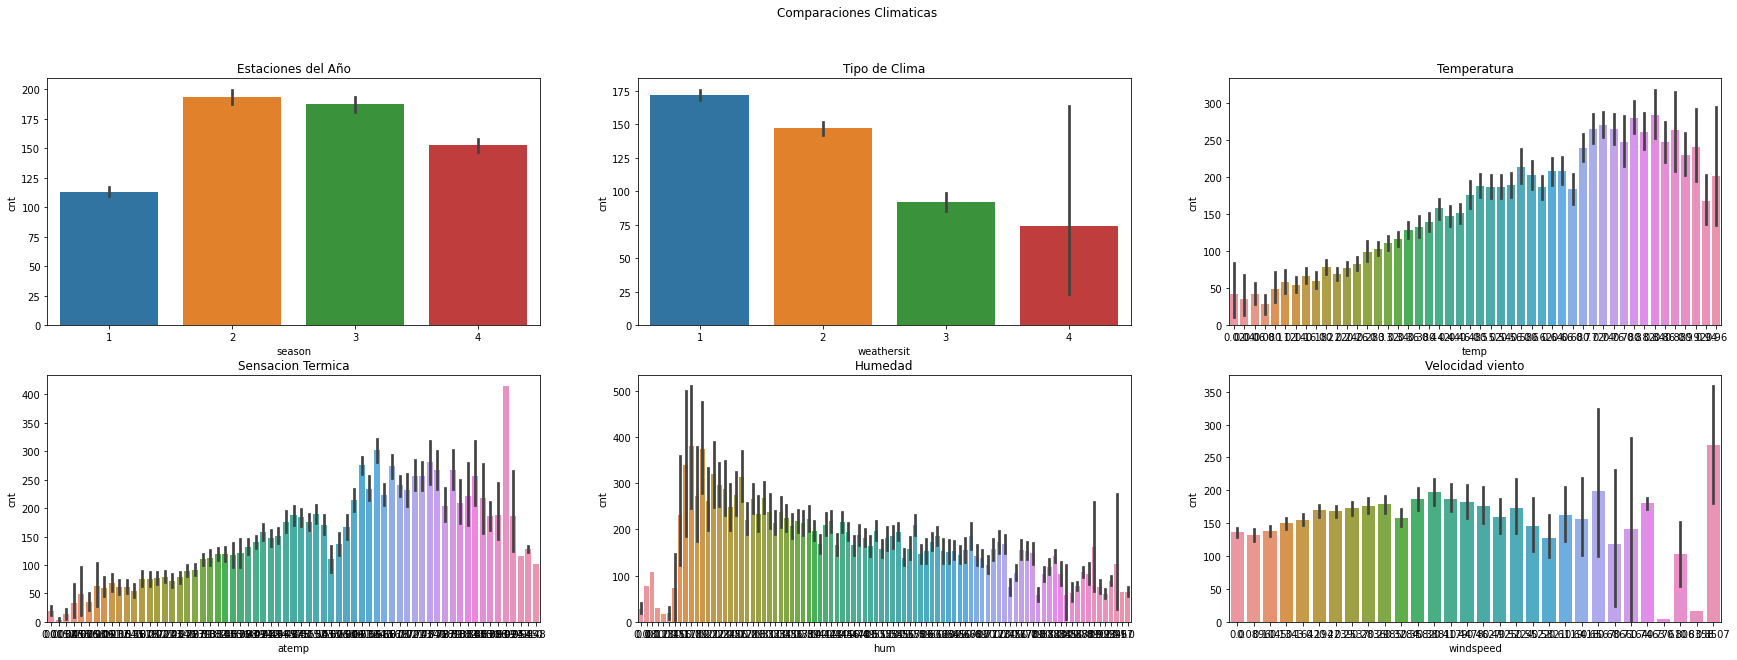

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10), sharey=False)
fig.suptitle('Comparaciones Climaticas')

# Estacion del año
sns.barplot(ax=axes[0,0], x=df_train_copia['season'], y=df_train_copia['cnt'])
axes[0,0].set_title('Estaciones del Año')

# Tipo de clima
sns.barplot(ax=axes[0,1], x=df_train_copia['weathersit'], y=df_train_copia['cnt'])
axes[0,1].set_title('Tipo de Clima')

# Temperatura
sns.barplot(ax=axes[0,2], x=df_train_copia['temp'], y=df_train_copia['cnt'])
axes[0,2].set_title('Temperatura')

# Sensacion Termica
sns.barplot(ax=axes[1,0], x=df_train_copia['atemp'], y=df_train_copia['cnt'])
axes[1,0].set_title('Sensacion Termica')

# Humedad
sns.barplot(ax=axes[1,1], x=df_train_copia['hum'], y=df_train_copia['cnt'])
axes[1,1].set_title('Humedad')

# Velocidad viento
sns.barplot(ax=axes[1,2], x=df_train_copia['windspeed'], y=df_train_copia['cnt'])
axes[1,2].set_title('Velocidad viento')


## Modelo Predictivo (Series temporales)
### Forecasting con Prophet


Primera etapa. Ejecutamos el modelo solo con columna fecha y renta(cnt)

In [28]:
df_train_copia.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [29]:
df = df_train_copia[['dteday', 'cnt']]
df = df.rename(columns= {'dteday' : 'ds', 'cnt' : 'y'})
df.head()


ds   y
0 2011-01-01  16
1 2011-01-01  40
2 2011-01-01  32
3 2011-01-01  13
4 2011-01-01   1

In [30]:
from prophet import Prophet

In [31]:
modelo = Prophet(daily_seasonality= True, weekly_seasonality= True, changepoint_prior_scale= 0.5, seasonality_prior_scale= 5)
modelo.fit(df)

21:32:25 - cmdstanpy - INFO - Chain [1] start processing
21:32:29 - cmdstanpy - INFO - Chain [1] done processing


Determinamos datos test

In [32]:
df_test_copia = df_test[['dteday']]
df_test_copia = df_test_copia.rename(columns= {'dteday' : 'ds'})

df_test_copia.head()

ds
0 2012-05-20
1 2012-05-20
2 2012-05-20
3 2012-05-20
4 2012-05-20

In [33]:
future = modelo.make_future_dataframe(periods=len(df_test_copia), freq= 'H')

In [34]:
future

ds
0    2011-01-01 00:00:00
1    2011-01-02 00:00:00
2    2011-01-03 00:00:00
3    2011-01-04 00:00:00
4    2011-01-05 00:00:00
...                  ...
5881 2012-12-30 00:00:00
5882 2012-12-30 01:00:00
5883 2012-12-30 02:00:00
5884 2012-12-30 03:00:00
5885 2012-12-30 04:00:00

[5886 rows x 1 columns]

In [35]:
forecast = modelo.predict(future)
forecast.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2011-01-01  22.389111 -106.058080  219.018936    22.389111    22.389111   
1 2011-01-02  22.914697 -140.148357  228.045146    22.914697    22.914697   
2 2011-01-03  23.440283 -144.905886  228.348793    23.440283    23.440283   
3 2011-01-04  23.965870 -126.023654  236.718599    23.965870    23.965870   
4 2011-01-05  24.491456 -127.434021  224.107268    24.491456    24.491456   

   additive_terms  additive_terms_lower  additive_terms_upper     daily  \
0       27.384626             27.384626             27.384626  26.23248   
1       19.863858             19.863858             19.863858  26.23248   
2       22.746762             22.746762             22.746762  26.23248   
3       30.200156             30.200156             30.200156  26.23248   
4       21.223445             21.223445             21.223445  26.23248   

   daily_lower  daily_upper    weekly  weekly_lower  weekly_upper  \
0     26.23248     26.23248  1.152146      1.152146      1.152146   
1     26.23248     26.23248 -6.368622     -6.368622     -6.368622   
2     26.23248     26.23248 -3.485718     -3.485718     -3.485718   
3     26.23248     26.23248  3.967676      3.967676      3.967676   
4     26.23248     26.23248 -5.009035     -5.009035     -5.009035   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  49.773737  
1                         0.0  42.778555  
2                         0.0  46.187046  
3                         0.0  54.166025  
4                         0.0  45.714901

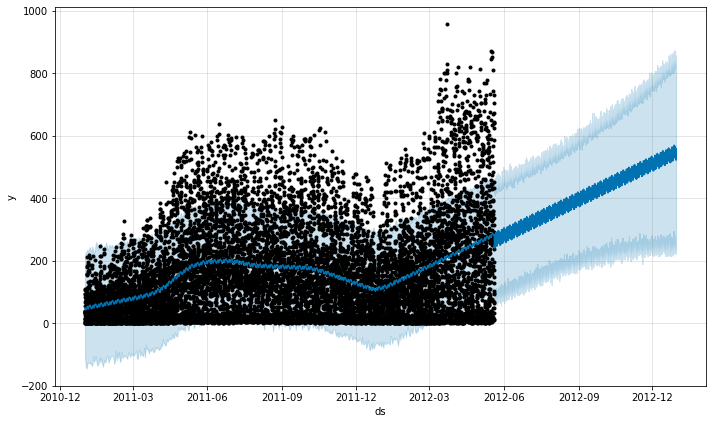

In [36]:
fig1 = modelo.plot(forecast)

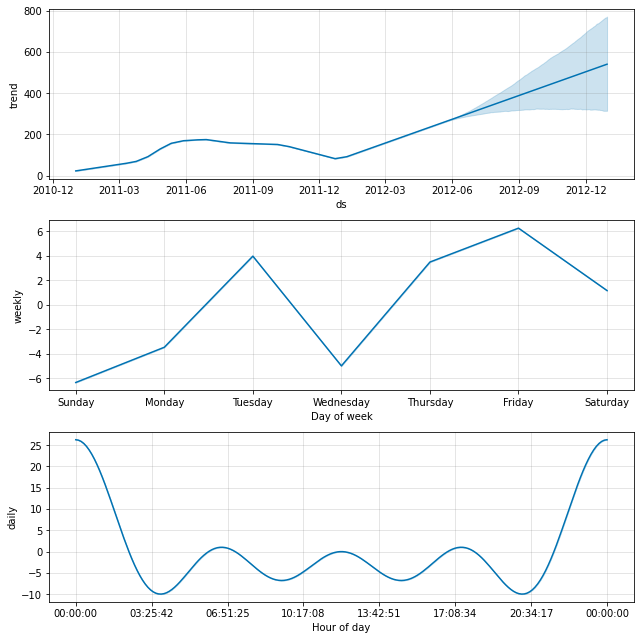

In [37]:
fig2 = modelo.plot_components(forecast)

### Evaluamos el Modelo de una variable

In [38]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.plot import plot_plotly, plot_forecast_component_plotly

In [39]:
df_cv = cross_validation(modelo, horizon = '30 days')

  0%|          | 0/26 [00:00<?, ?it/s]

21:32:33 - cmdstanpy - INFO - Chain [1] start processing
21:32:33 - cmdstanpy - INFO - Chain [1] done processing
21:32:34 - cmdstanpy - INFO - Chain [1] start processing
21:32:34 - cmdstanpy - INFO - Chain [1] done processing
21:32:35 - cmdstanpy - INFO - Chain [1] start processing
21:32:36 - cmdstanpy - INFO - Chain [1] done processing
21:32:36 - cmdstanpy - INFO - Chain [1] start processing
21:32:37 - cmdstanpy - INFO - Chain [1] done processing
21:32:38 - cmdstanpy - INFO - Chain [1] start processing
21:32:38 - cmdstanpy - INFO - Chain [1] done processing
21:32:39 - cmdstanpy - INFO - Chain [1] start processing
21:32:39 - cmdstanpy - INFO - Chain [1] done processing
21:32:40 - cmdstanpy - INFO - Chain [1] start processing
21:32:40 - cmdstanpy - INFO - Chain [1] done processing
21:32:41 - cmdstanpy - INFO - Chain [1] start processing
21:32:42 - cmdstanpy - INFO - Chain [1] done processing
21:32:42 - cmdstanpy - INFO - Chain [1] start processing
21:32:43 - cmdstanpy - INFO - Chain [1]

In [40]:
df_cv.head()

ds        yhat  yhat_lower  yhat_upper    y     cutoff
0 2011-04-12  114.655143   32.995732  201.343590   44 2011-04-11
1 2011-04-12  114.655143   26.467955  206.341281   39 2011-04-11
2 2011-04-12  114.655143   24.008369  198.799616   54 2011-04-11
3 2011-04-12  114.655143   16.339147  198.887936   84 2011-04-11
4 2011-04-12  114.655143   23.760441  202.602305  103 2011-04-11

In [41]:
df_perform = performance_metrics(df_cv)
df_perform.describe()

horizon           mse        rmse         mae  \
count                         28     28.000000   28.000000   28.000000   
mean            16 days 12:00:00  24320.608472  155.882515  122.787731   
std    8 days 05:25:24.250324976   1458.291060    4.694348    3.328696   
min              3 days 00:00:00  21101.602444  145.263906  115.594735   
25%              9 days 18:00:00  23505.301298  153.314304  120.831534   
50%             16 days 12:00:00  24120.465905  155.307646  122.415856   
75%             23 days 06:00:00  25570.686309  159.908365  125.753753   
max             30 days 00:00:00  26751.156999  163.557809  127.929883   

            mape      mdape      smape   coverage  
count  28.000000  28.000000  28.000000  28.000000  
mean    6.314852   0.568124   0.799389   0.678056  
std     0.200282   0.013985   0.009403   0.012879  
min     5.976393   0.538598   0.782421   0.651637  
25%     6.165894   0.561769   0.794796   0.669834  
50%     6.299810   0.570467   0.797388   0.675905  
75%     6.487661   0.577014   0.804235   0.685180  
max     6.745756   0.596065   0.820432   0.703427

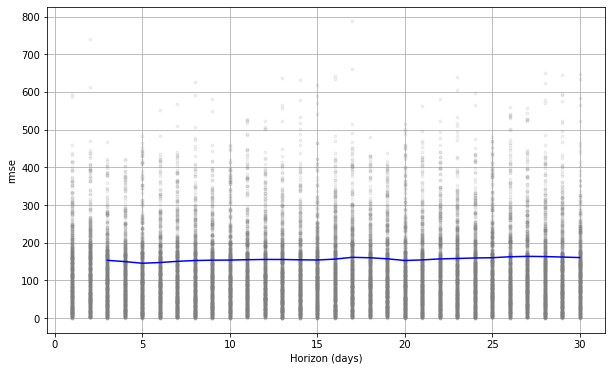

In [42]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [43]:
print('El RMSE es:', df_perform.rmse.mean())

El RMSE es: 155.88251539295993


In [44]:
df_p = performance_metrics(df_cv, rolling_window = 1)

In [45]:
df_p

horizon          mse        rmse         mae     mape     mdape     smape  \
0 30 days  24360.38708  156.078144  122.914178  6.30865  0.567881  0.800346   

   coverage  
0  0.677487

### Corremos modelo con mas variables

Entrenamiento. Quitamos columnas que no vamos a utilizar

season	additive	2.210684	3.590963	8.023040	11.962129
1	holiday	additive	0.000000	-7.924182	14.218499	21.370418
2	weekday	additive	3.009334	-3.035912	-0.626267	1.894119
3	weathersit	additive	1.435036	-27.193513	-24.590525	-21.100504
4	workingday	additive	0.000000	10.876728	24.704566	33.155576
5	temp	additive	0.465704	46.697225	76.420593	138.666448
6	atemp	additive	0.448888	119.840328	168.053284	230.010977
7	hum	additive	0.625770	-78.782945	-62.591249	-53.079264
8	windspeed	additive	0.196433	-55.735901	-32.504112	-15.312899

In [46]:
# Genero dataframe de entrenamiento y transformo columna fechas.
#df_grupo = df_train[['dteday', 'hr', 'cnt', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
df_grupo = df_train[['dteday', 'hr', 'cnt', 'atemp']]
df_grupo['fecha_or'] = df_grupo['dteday'].dt.strftime('%Y-%m-%d')
df_grupo['hr_str'] = df_grupo['hr'].astype('str') 
df_grupo['dteday'] = df_grupo['fecha_or'] + ' ' +df_grupo['hr_str']+':00:00'
df_grupo['dteday'] = pd.to_datetime(df_grupo['dteday'])
df_grupo.drop(columns= ['fecha_or','hr_str', 'hr'], inplace= True)
df_grupo = df_grupo.rename(columns= {'dteday' : 'ds', 'cnt' : 'y'})
df_grupo.head()

C:\Users\Mauricio\AppData\Local\Temp\ipykernel_7712\3052381016.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grupo['fecha_or'] = df_grupo['dteday'].dt.strftime('%Y-%m-%d')
C:\Users\Mauricio\AppData\Local\Temp\ipykernel_7712\3052381016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grupo['hr_str'] = df_grupo['hr'].astype('str')
C:\Users\Mauricio\AppData\Local\Temp\ipykernel_7712\3052381016.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

ds   y   atemp
0 2011-01-01 00:00:00  16  0.2879
1 2011-01-01 01:00:00  40  0.2727
2 2011-01-01 02:00:00  32  0.2727
3 2011-01-01 03:00:00  13  0.2879
4 2011-01-01 04:00:00   1  0.2879

In [47]:
from prophet import Prophet

In [48]:
#modelo2 = Prophet(yearly_seasonality= True, uncertainty_samples = 50, mcmc_samples=50, interval_width= 0.6)
modelo2 = Prophet(daily_seasonality= True, 
                    weekly_seasonality= True, 
                    yearly_seasonality= False, 
                    n_changepoints= 24*30,
                    changepoint_prior_scale= 0.1, 
                    #seasonality_prior_scale= 1,
                    #mcmc_samples = 60, 
                    #interval_width =0.95,                     
                    )
#modelo2.add_country_holidays(country_name='US')
#modelo2.add_regressor('season')
#modelo2.add_regressor('holiday')
#modelo2.add_regressor('weekday')
#modelo2.add_regressor('weathersit')
#modelo2.add_regressor('workingday')
#modelo2.add_regressor('temp')
modelo2.add_regressor('atemp')
#modelo2.add_regressor('hum')
#modelo2.add_regressor('windspeed')
modelo2.fit(df_grupo)

21:37:06 - cmdstanpy - INFO - Chain [1] start processing
21:38:18 - cmdstanpy - INFO - Chain [1] done processing


Preparamos dataframe para prediccion y reralizamos prediccion

In [49]:
from prophet.utilities import regressor_coefficients
 

In [50]:
regressor_coefficients(modelo2)

regressor regressor_mode    center  coef_lower        coef  coef_upper
0     atemp       additive  0.448888  247.730123  247.730123  247.730123

Prediccón con datos reales y datos nuevos

In [51]:
#df_test_grupo = df_test[['dteday', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']].copy()
df_test_grupo = df_test[['dteday', 'hr', 'atemp']].copy()
df_test_grupo = df_test_grupo.rename(columns= {'dteday' : 'ds'})

In [58]:
df_grupo = df_grupo.set_index('ds')
df_test_grupo = df_test_grupo.set_index('ds')

In [53]:
# Funciones para completar datos futuros
def estacion(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
            return df_test_grupo[date:]['season'].values[0]
    else:
            return (df_grupo[date:]['season']).values[0]
    
    return 0

def clima(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_grupo[date:]['weathersit'].values[0]
    else:
        return (df_grupo[date:]['weathersit']).values[0]
    
    return 0

def temp(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_grupo[date:]['temp'].values[0]
    else:
        return (df_grupo[date:]['temp']).values[0]
    
    return 0

def sen_tem(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_grupo[date:]['atemp'].values[0]
    else:
        return (df_grupo[date:]['atemp']).values[0]
    
    return 0

def vacaciones(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_grupo[date:]['holiday'].values[0]
    else:
        return (df_grupo[date:]['holiday']).values[0]
    
    return 0

def dia_semana(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_grupo[date:]['weekday'].values[0]
    else:
        return (df_grupo[date:]['weekday']).values[0]
    
    return 0

def feriado(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_grupo[date:]['workingday'].values[0]
    else:
        return (df_grupo[date:]['workingday']).values[0]
    
    return 0

def humedad(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_grupo[date:]['hum'].values[0]
    else:
        return (df_grupo[date:]['hum']).values[0]
    
    return 0

def viento(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_grupo[date:]['windspeed'].values[0]
    else:
        return (df_grupo[date:]['windspeed']).values[0]
    
    return 0



In [54]:
# Creacion de Dataframe a predecir
future_grupo = modelo2.make_future_dataframe(periods= len(df_test_grupo), freq= 'H')

In [60]:
# Agregamos y completamos columnas
#future_grupo['season'] = future_grupo['ds'].apply(estacion)
#future_grupo['holiday'] = future_grupo['ds'].apply(vacaciones)
#future_grupo['weekday'] = future_grupo['ds'].apply(dia_semana)
#future_grupo['workingday'] = future_grupo['ds'].apply(feriado)
#future_grupo['weathersit'] = future_grupo['ds'].apply(clima)
#future_grupo['temp'] = future_grupo['ds'].apply(temp)
future_grupo['atemp'] = future_grupo['ds'].apply(sen_tem)
#future_grupo['hum'] = future_grupo['ds'].apply(humedad)
#future_grupo['windspeed'] = future_grupo['ds'].apply(viento)

In [61]:
future_grupo

ds   atemp
0     2011-01-01 00:00:00  0.2879
1     2011-01-01 01:00:00  0.2879
2     2011-01-01 02:00:00  0.2879
3     2011-01-01 03:00:00  0.2879
4     2011-01-01 04:00:00  0.2879
...                   ...     ...
17374 2012-12-30 03:00:00  0.2576
17375 2012-12-30 04:00:00  0.2576
17376 2012-12-30 05:00:00  0.2576
17377 2012-12-30 06:00:00  0.2576
17378 2012-12-30 07:00:00  0.2576

[17379 rows x 2 columns]

In [62]:
forecast2 = modelo2.predict(future_grupo)

In [63]:
plot_plotly(modelo2,forecast2)

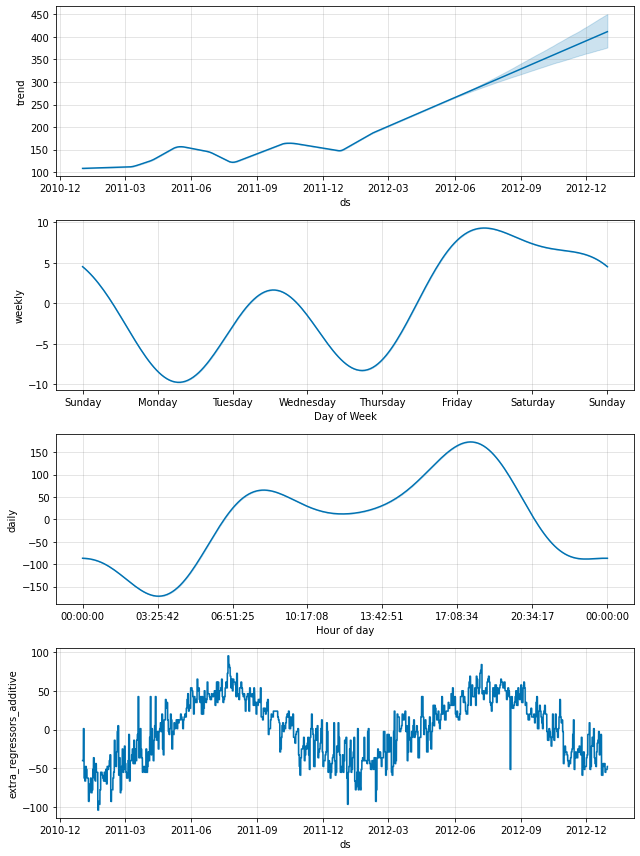

In [64]:
fig3 = modelo2.plot_components(forecast2)

In [65]:
len(forecast2.iloc[11999:])

5380

In [81]:
df_export = pd.DataFrame(forecast2.iloc[11999:]['yhat'])

df_export.rename(columns = {'yhat': 'pred'}, inplace= True)
df_export.to_csv('vilarmauricio.csv', index= False)

Predicción solo datos nuevos.

In [67]:
#df_test_hora = df_test[['dteday', 'hr',  'holiday', 'workingday', 'temp', 'atemp']].copy()
df_test_hora = df_test[['dteday', 'hr',  'atemp']].copy()
df_test_hora['fecha_or'] = df_test_hora['dteday'].dt.strftime('%Y-%m-%d')
df_test_hora['hr_str'] = df_test_hora['hr'].astype('str') 
df_test_hora['dteday'] = df_test_hora['fecha_or'] + ' ' +df_test_hora['hr_str']+':00:00'
df_test_hora['dteday'] = pd.to_datetime(df_test_hora['dteday'])
df_test_hora.drop(columns= ['fecha_or','hr_str', 'hr'], inplace= True)
df_test_hora = df_test_hora.rename(columns= {'dteday' : 'ds'})

In [68]:
forecast3 = modelo2.predict(df_test_hora)

In [69]:
plot_plotly(modelo2,forecast3)

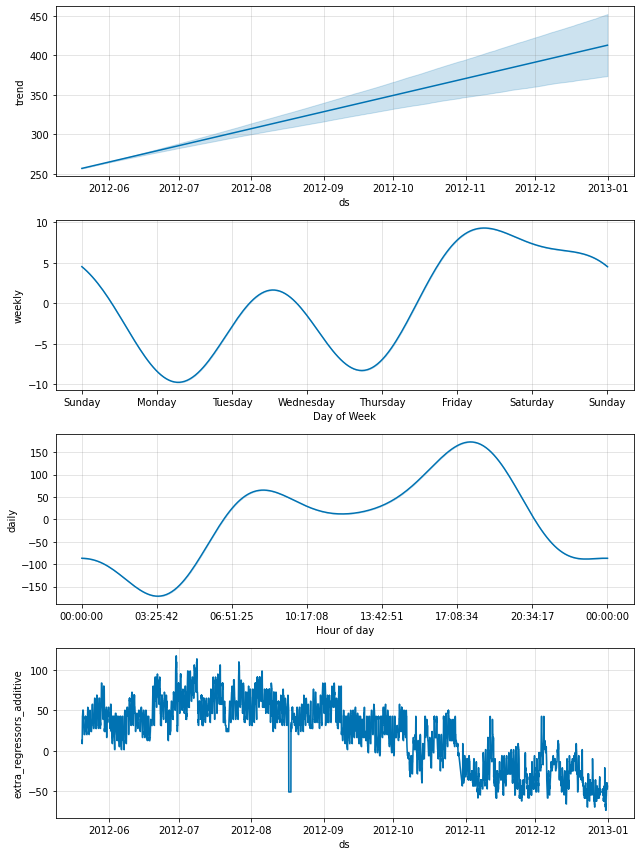

In [70]:
fig3 = modelo2.plot_components(forecast3)

Creamos archivo a exportar

In [346]:
df_export = pd.DataFrame(forecast3['yhat'])

df_export.rename(columns = {'yhat': 'pred'}, inplace= True)
#df_export.to_csv('vilarmauricio2.csv', index= False)

### Evaluamos el Modelo de varias variables

In [71]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.utilities import regressor_coefficients 

In [72]:
df_cv = cross_validation(modelo2, horizon = '168 hours')

  0%|          | 0/137 [00:00<?, ?it/s]

21:44:41 - cmdstanpy - INFO - Chain [1] start processing
21:44:42 - cmdstanpy - INFO - Chain [1] done processing
21:44:43 - cmdstanpy - INFO - Chain [1] start processing
21:44:43 - cmdstanpy - INFO - Chain [1] done processing
21:44:44 - cmdstanpy - INFO - Chain [1] start processing
21:44:44 - cmdstanpy - INFO - Chain [1] done processing
21:44:45 - cmdstanpy - INFO - Chain [1] start processing
21:44:46 - cmdstanpy - INFO - Chain [1] done processing
21:44:47 - cmdstanpy - INFO - Chain [1] start processing
21:44:49 - cmdstanpy - INFO - Chain [1] done processing
21:44:50 - cmdstanpy - INFO - Chain [1] start processing
21:44:51 - cmdstanpy - INFO - Chain [1] done processing
21:44:52 - cmdstanpy - INFO - Chain [1] start processing
21:44:56 - cmdstanpy - INFO - Chain [1] done processing
21:44:57 - cmdstanpy - INFO - Chain [1] start processing
21:45:04 - cmdstanpy - INFO - Chain [1] done processing
21:45:05 - cmdstanpy - INFO - Chain [1] start processing
21:45:08 - cmdstanpy - INFO - Chain [1]

In [73]:
df_cv.head()

ds       yhat  yhat_lower  yhat_upper   y  \
0 2011-01-23 05:00:00  -9.731995  -51.861667   29.026141   3   
1 2011-01-23 06:00:00  20.539991  -22.995726   58.770420   1   
2 2011-01-23 07:00:00  53.561629   12.173177   92.748670   2   
3 2011-01-23 08:00:00  71.047785   30.405169  113.704184  19   
4 2011-01-23 09:00:00  71.616194   27.669405  109.880263  28   

               cutoff  
0 2011-01-23 03:00:00  
1 2011-01-23 03:00:00  
2 2011-01-23 03:00:00  
3 2011-01-23 03:00:00  
4 2011-01-23 03:00:00

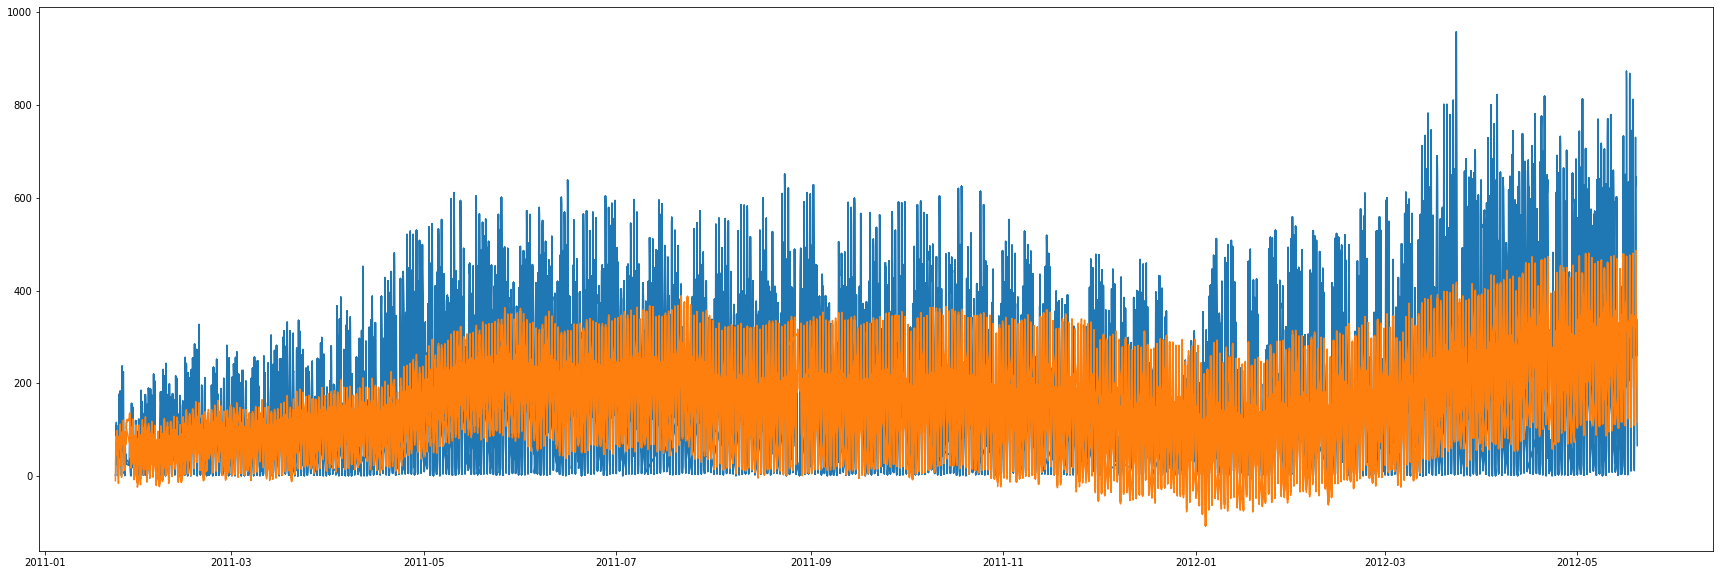

In [74]:
fig, ax = plt.subplots(figsize = (30, 10))
plt.plot(df_cv['ds'], df_cv.y)
plt.plot(df_cv['ds'], df_cv.yhat)


In [75]:
df_perform = performance_metrics(df_cv)
df_perform.describe()

horizon           mse        rmse         mae  \
count                        152    152.000000  152.000000  152.000000   
mean             3 days 20:30:00   9463.786499   96.926426   70.105850   
std    1 days 20:01:21.797061997   1629.716081    8.337365    7.530289   
min              0 days 17:00:00   6578.484471   81.107857   56.747539   
25%              2 days 06:45:00   8404.173868   91.674268   64.864751   
50%              3 days 20:30:00   9393.757453   96.921398   69.600065   
75%              5 days 10:15:00  10426.916893  102.112276   73.498370   
max              7 days 00:00:00  13968.113539  118.186774   88.587810   

             mape       mdape       smape    coverage  
count  152.000000  152.000000  152.000000  152.000000  
mean     2.212554    0.415740    0.616896    0.729686  
std      0.477596    0.049170    0.065621    0.052140  
min      1.305394    0.320933    0.500902    0.600795  
25%      1.861781    0.383705    0.565631    0.703476  
50%      2.158451    0.412966    0.610027    0.736008  
75%      2.576112    0.451845    0.657551    0.767996  
max      3.127165    0.519205    0.768911    0.808591

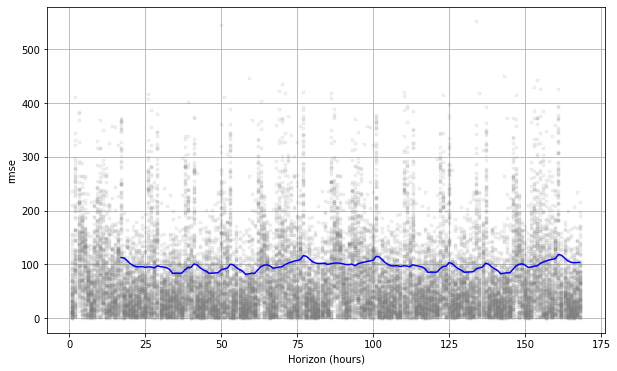

In [76]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [77]:
print('El RMSE es:', df_perform.rmse.mean())

El RMSE es: 96.92642648403994


In [78]:
df_p = performance_metrics(df_cv, rolling_window = 1)

In [79]:
df_p

horizon          mse       rmse        mae     mape     mdape     smape  \
0  7 days  9533.402192  97.639143  70.529335  2.23462  0.418922  0.621545   

   coverage  
0  0.726329

In [80]:
regressor_coefficients(modelo2)

regressor regressor_mode    center  coef_lower        coef  coef_upper
0     atemp       additive  0.448888  247.730123  247.730123  247.730123

#### Ajustes de hiperparametros

In [244]:
# Genero dataframe de entrenamiento y transformo columna fechas.
#df_grupo = df_train[['dteday', 'hr', 'cnt', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
df_grupo2 = df_train[['dteday', 'hr', 'cnt', 'season', 'weathersit', 'temp', 'hum']]
df_grupo2['fecha_or'] = df_grupo2['dteday'].dt.strftime('%Y-%m-%d')
df_grupo2['hr_str'] = df_grupo2['hr'].astype('str') 
df_grupo2['dteday'] = df_grupo2['fecha_or'] + ' ' +df_grupo2['hr_str']+':00:00'
df_grupo2['dteday'] = pd.to_datetime(df_grupo2['dteday'])
df_grupo2.drop(columns= ['fecha_or','hr_str', 'hr'], inplace= True)
df_grupo2 = df_grupo2.rename(columns= {'dteday' : 'ds', 'cnt' : 'y'})
df_grupo2.head()

C:\Users\Mauricio\AppData\Local\Temp\ipykernel_27528\4209013729.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mauricio\AppData\Local\Temp\ipykernel_27528\4209013729.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mauricio\AppData\Local\Temp\ipykernel_27528\4209013729.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

ds   y  season  weathersit  temp   hum
0 2011-01-01 00:00:00  16       1           1  0.24  0.81
1 2011-01-01 01:00:00  40       1           1  0.22  0.80
2 2011-01-01 02:00:00  32       1           1  0.22  0.80
3 2011-01-01 03:00:00  13       1           1  0.24  0.75
4 2011-01-01 04:00:00   1       1           1  0.24  0.75

In [246]:
# Python
import itertools
import numpy as np
import pandas as pd

# Parametros a variar
param_grid = {  
    'changepoint_prior_scale': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
    'seasonality_prior_scale': [0.5, 1, 2.5, 5, 7.5, 10],
}

# Generacion de combinacion de todos los parametros
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Uso de cross validation para evaluar todos los parametros
for params in all_params:
    m = Prophet(**params)  
    m.add_regressor('season')
    #m.add_regressor('holiday')
    #m.add_regressor('weekday')
    m.add_regressor('weathersit')
    #m.add_regressor('workingday')
    m.add_regressor('temp')
    #m.add_regressor('atemp')
    m.add_regressor('hum')
    #m.add_regressor('windspeed')
    m.fit(df_grupo2)
    df_cv = cross_validation(m, horizon='15 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Buscamos mejores parametros de rmse
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)


17:01:16 - cmdstanpy - INFO - Chain [1] start processing
17:01:21 - cmdstanpy - INFO - Chain [1] done processing
17:02:50 - cmdstanpy - INFO - Chain [1] start processing
17:02:55 - cmdstanpy - INFO - Chain [1] done processing
17:04:18 - cmdstanpy - INFO - Chain [1] start processing
17:04:22 - cmdstanpy - INFO - Chain [1] done processing
17:05:49 - cmdstanpy - INFO - Chain [1] start processing
17:05:52 - cmdstanpy - INFO - Chain [1] done processing
17:07:16 - cmdstanpy - INFO - Chain [1] start processing
17:07:20 - cmdstanpy - INFO - Chain [1] done processing
17:08:51 - cmdstanpy - INFO - Chain [1] start processing
17:08:58 - cmdstanpy - INFO - Chain [1] done processing
17:10:52 - cmdstanpy - INFO - Chain [1] start processing
17:10:58 - cmdstanpy - INFO - Chain [1] done processing
17:13:08 - cmdstanpy - INFO - Chain [1] start processing
17:13:16 - cmdstanpy - INFO - Chain [1] done processing
17:15:23 - cmdstanpy - INFO - Chain [1] start processing
17:15:32 - cmdstanpy - INFO - Chain [1]

    changepoint_prior_scale  seasonality_prior_scale       rmse
0                      0.05                      0.5  98.507913
1                      0.05                      1.0  98.482032
2                      0.05                      2.5  98.486867
3                      0.05                      5.0  98.496499
4                      0.05                      7.5  98.499830
5                      0.05                     10.0  98.485404
6                      0.10                      0.5  98.546067
7                      0.10                      1.0  98.555311
8                      0.10                      2.5  98.547175
9                      0.10                      5.0  98.546739
10                     0.10                      7.5  98.517879
11                     0.10                     10.0  98.542590
12                     0.20                      0.5  98.602016
13                     0.20                      1.0  98.622173
14                     0.20             

In [247]:
# Python
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1}
